# RVAA - RealVsAiArt-based model
This notebook contains the code of our attempts at training a model on the RVAA dataset. 

The RVAA dataset contains around 2k images, which can either be real or AI-generated. However, unlike CIFAKE, the images are completely heterogenous: they have different resolution, different aspect-ratios and even different RGB formats. In addition, some of the images tagged as AI-generated are only "partially" so: in some cases, an image from a diffusion model will be shown side-by-side with a real image, or text will be present all over the image.

This can pose quite the challenge for our model. Nevertheless, the final results are quite promising.

In [13]:
import torch
from torchvision.models import resnet50
import model_utils
import plotter
import data_utils
import torch.nn as nn
from torch.utils.data import DataLoader, Subset, ConcatDataset
import importlib
import pandas as pd
import torchvision.transforms as transforms


model_utils.fix_random(42)

In [14]:
dataset = data_utils.RVAADataset(root_dir="data/RealVsAiArt")
df_stats = data_utils.get_dataset_stats(dataset)
pd.DataFrame.from_dict(df_stats, orient='index')

# size of image to resize
IMG_SIZE = 224

In [15]:
transform = transforms.Compose([
    transforms.Lambda(lambda image: image.convert('RGB')),
    transforms.Resize(IMG_SIZE),                  # Resize the shorter side to IMG_SIZE while keeping aspect ratio
    transforms.Lambda(data_utils.pad_to_square),  # Apply the dynamic padding to make the image square
    transforms.Resize((IMG_SIZE, IMG_SIZE)),      # Ensure the final image is exactly IMG_SIZExIMG_SIZE
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalizing "should" help with Pretrained nets
])

dataset = data_utils.RVAADataset(root_dir="data/RealVsAiArt", transform=transform)

LEARNING_RATE = 3e-4
EPOCHS = 20
BATCH_SIZE = 32

train_dataset, val_dataset, test_dataset = data_utils.train_test_split((0.7, 0.10), dataset=dataset)

train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True)

loss_fn = nn.BCEWithLogitsLoss()
device = model_utils.get_device()
print(f"using {device} device")

dataloaders = (train_dataloader, val_dataloader)

using cuda device


In [16]:
ft_resnet50 = resnet50(weights='IMAGENET1K_V1')
model_utils.prepare_for_ft(ft_resnet50, num_classes=1)
ft_resnet50.to(device)

optimizer = torch.optim.AdamW(ft_resnet50.fc.parameters(), lr=LEARNING_RATE)
model_name = "FTRes50_RVAA"

In [17]:
artifacts = model_utils.train(dataloaders, loss_fn, optimizer,
                              ft_resnet50, model_name, BATCH_SIZE,
                              EPOCHS, loss_thresh=2.5, force_train=True)

Epoch 1/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 66.0%, Avg loss: 0.664934
New best model found! (based on lowest loss)
...and saved.


Epoch 2/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 56.7%, Avg loss: 0.696062


Epoch 3/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 57.7%, Avg loss: 0.585609
New best model found! (based on lowest loss)
...and saved.


Epoch 4/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 74.2%, Avg loss: 0.677004


Epoch 5/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 62.9%, Avg loss: 0.585545
New best model found! (based on lowest loss)
...and saved.


Epoch 6/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 69.1%, Avg loss: 0.529551
New best model found! (based on lowest loss)
...and saved.


Epoch 7/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 73.2%, Avg loss: 0.562089


Epoch 8/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 73.2%, Avg loss: 0.664539


Epoch 9/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 74.2%, Avg loss: 0.499072
New best model found! (based on lowest loss)
...and saved.


Epoch 10/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 74.2%, Avg loss: 0.561641


Epoch 11/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 73.2%, Avg loss: 0.524096


Epoch 12/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 73.2%, Avg loss: 0.540417


Epoch 13/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 75.3%, Avg loss: 0.532578


Epoch 14/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 67.0%, Avg loss: 0.596757


Epoch 15/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 71.1%, Avg loss: 0.645676


Epoch 16/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 74.2%, Avg loss: 0.808463


Epoch 17/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 72.2%, Avg loss: 0.518680


Epoch 18/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 72.2%, Avg loss: 0.534049


Epoch 19/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 71.1%, Avg loss: 0.431385
New best model found! (based on lowest loss)
...and saved.


Epoch 20/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 74.2%, Avg loss: 0.651507




c:\Users\tekke\Desktop\ethics_project2\model_utils.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(weight_path))


Test Error:
Accuracy: 75.8%, Avg loss: 0.455122
Confusion matrix report, tp: 58, fp: 27, fn: 20, tn:89


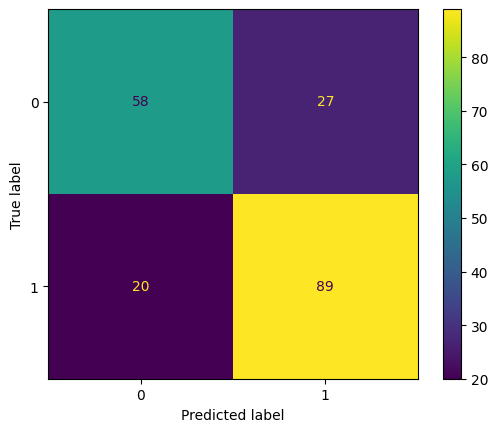

Precision: 0.68, Recall: 0.74, F1-Score: 0.71


(0.45512191312653677, tensor(0.7577, device='cuda:0'))

In [18]:
model_utils.test(test_dataloader, ft_resnet50, loss_fn, device,
                 model_name=model_name, visualize=True)

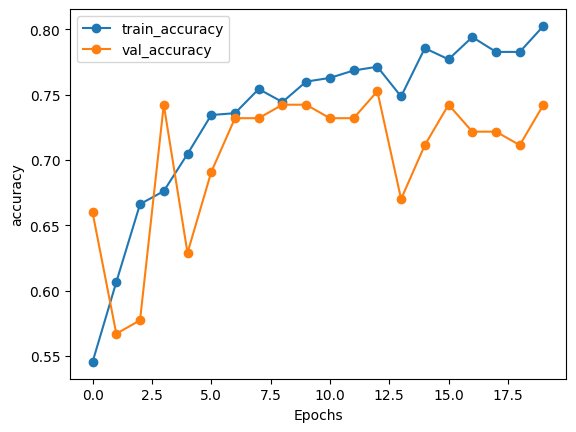

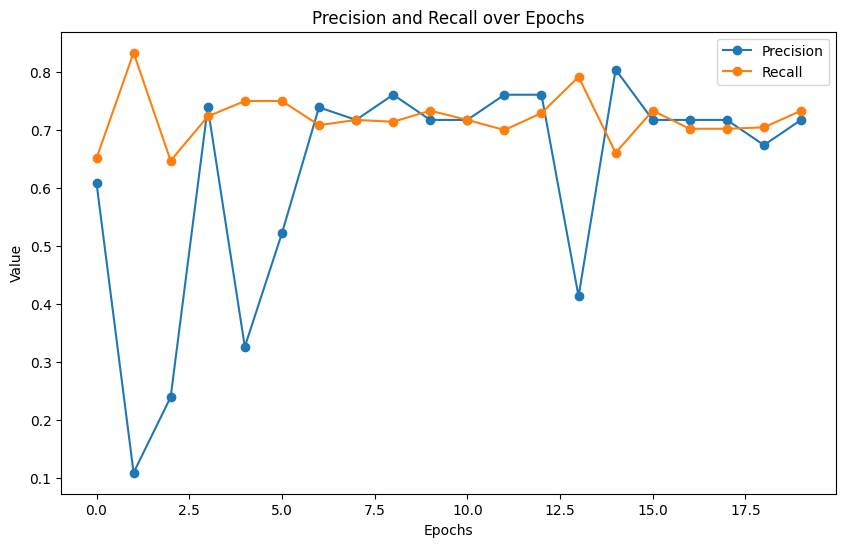

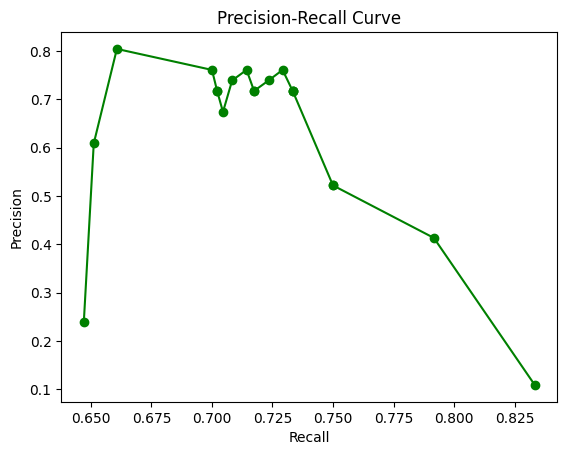

In [19]:
if artifacts != None:
    losses, train_accs, test_accs, precisions, recalls = artifacts
    plotter.plot_generic_metrics((train_accs, test_accs), "accuracy", model_name)
    plotter.plot_precision_recall_curve(precisions, recalls, model_name)

Step2 FT

In [20]:
for param in ft_resnet50.parameters():
    param.requires_grad = True

optimizer = torch.optim.AdamW(ft_resnet50.parameters(), lr=LEARNING_RATE)
model_name="FTRes50RVAA_beefy"

In [21]:
artifacts = model_utils.train(dataloaders, loss_fn, optimizer, ft_resnet50, model_name, BATCH_SIZE, EPOCHS, loss_thresh=2.5, force_train=False)

Epoch 1/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 71.1%, Avg loss: 1.249187
New best model found! (based on lowest loss)
...and saved.


Epoch 2/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 71.1%, Avg loss: 0.843217
New best model found! (based on lowest loss)
...and saved.


Epoch 3/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 69.1%, Avg loss: 1.762247


Epoch 4/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 71.1%, Avg loss: 1.039014


Epoch 5/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 73.2%, Avg loss: 0.691482
New best model found! (based on lowest loss)
...and saved.


Epoch 6/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 69.1%, Avg loss: 0.930626


Epoch 7/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 77.3%, Avg loss: 1.724516


Epoch 8/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 55.7%, Avg loss: 1.943084


Epoch 9/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 61.9%, Avg loss: 1.499459


Epoch 10/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 67.0%, Avg loss: 0.885764


Epoch 11/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 69.1%, Avg loss: 1.167293


Epoch 12/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 63.9%, Avg loss: 1.798681


Epoch 13/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 67.0%, Avg loss: 1.253820


Epoch 14/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 70.1%, Avg loss: 1.058080


Epoch 15/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 74.2%, Avg loss: 0.587210
New best model found! (based on lowest loss)
...and saved.


Epoch 16/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 67.0%, Avg loss: 0.949448


Epoch 17/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 71.1%, Avg loss: 1.185340


Epoch 18/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 69.1%, Avg loss: 0.899023


Epoch 19/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 72.2%, Avg loss: 1.100665


Epoch 20/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Error:
Accuracy: 70.1%, Avg loss: 4.786664




c:\Users\tekke\Desktop\ethics_project2\model_utils.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(weight_path))


Test Error:
Accuracy: 77.8%, Avg loss: 0.576512
Confusion matrix report, tp: 78, fp: 7, fn: 36, tn:73


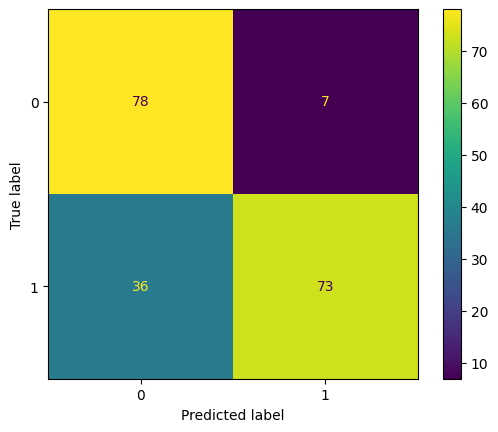

Precision: 0.92, Recall: 0.68, F1-Score: 0.78


(0.5765116683074406, tensor(0.7784, device='cuda:0'))

In [22]:
model_name = "best_FTRes50RVAA_beefy"
model_utils.test(test_dataloader, ft_resnet50, loss_fn, device, model_name=model_name, visualize=True)

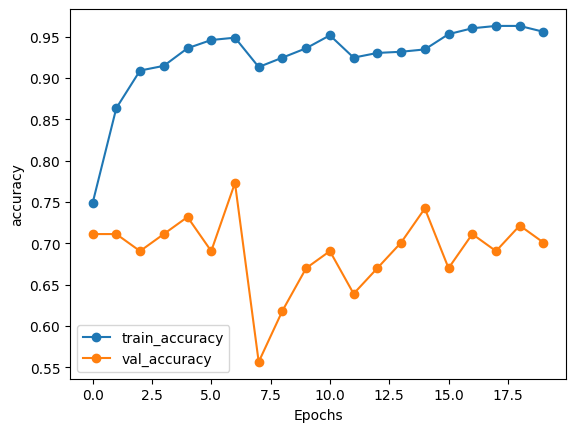

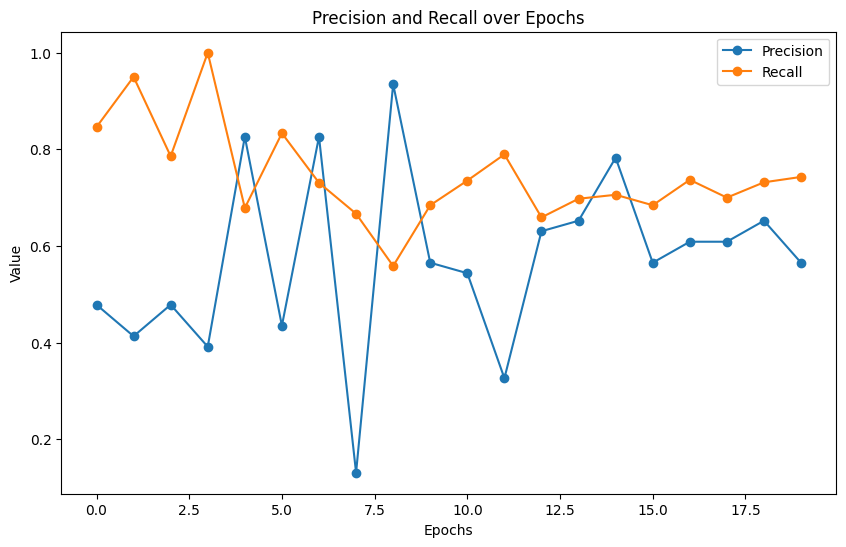

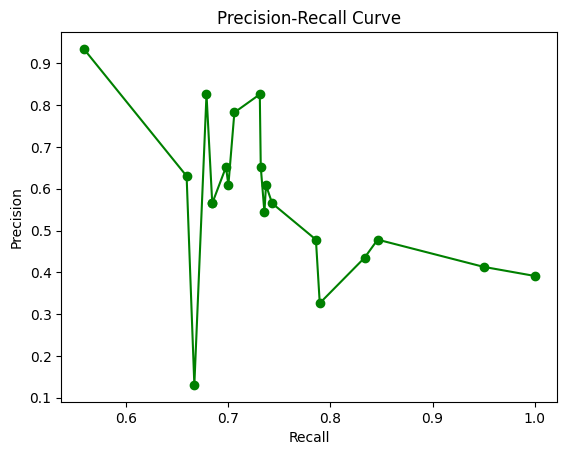

In [23]:
if artifacts != None:
    losses, train_accs, test_accs, precisions, recalls = artifacts 
    plotter.plot_generic_metrics((train_accs, test_accs), "accuracy", model_name)
    plotter.plot_precision_recall_curve(precisions, recalls, model_name)

GradCAM Test

100%|██████████| 64/64 [00:11<00:00,  5.52it/s]


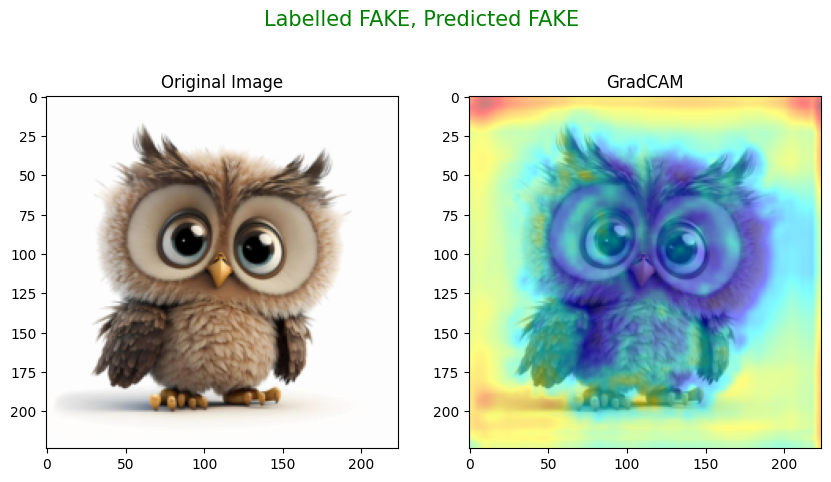

In [25]:
import xai
chp = torch.load('checkpoints/best_FTRES50_RVAA.pth', weights_only=True)
ft_resnet50.load_state_dict(chp)

xai.set_device(device)
xai.explain_gradcam_single_image(train_dataloader,
                                ft_resnet50, [ft_resnet50.layer1, ft_resnet50.layer2, ft_resnet50.layer3, ft_resnet50.layer4],
                                index = 3)

100%|██████████| 64/64 [00:27<00:00,  2.33it/s]


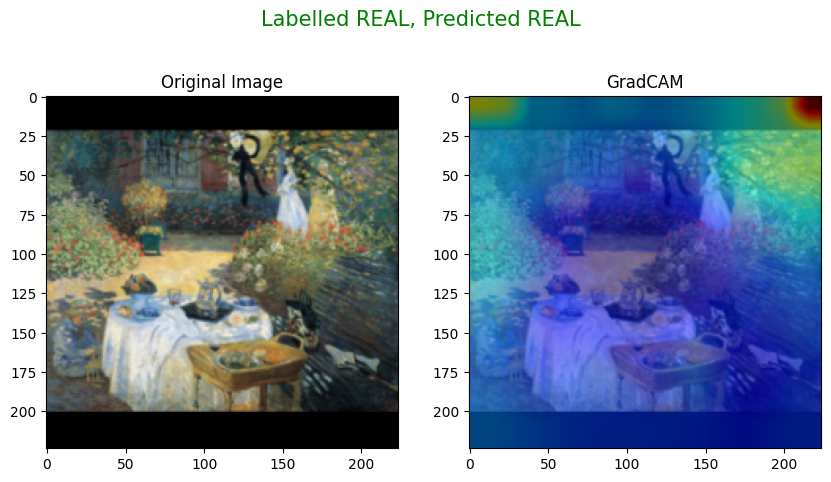

In [26]:
xai.explain_gradcam_single_image(test_dataloader,
                                ft_resnet50, [ft_resnet50.layer1, ft_resnet50.layer2, ft_resnet50.layer3, ft_resnet50.layer4],
                                index = 2)

LIME experiment

100%|██████████| 1000/1000 [00:05<00:00, 173.12it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0357141494750977..2.640000104904175].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0357141494750977..2.640000104904175].


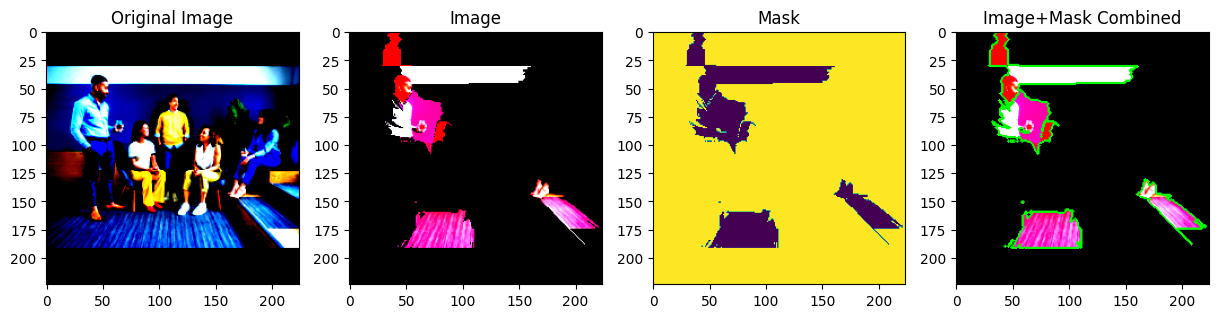

In [27]:
xai.explain_lime_single_image(train_dataloader, ft_resnet50)

### Data Augmentation Experiment
ignore if it not worky welly.

In [28]:
augmented_transform = transforms.Compose([
    transforms.Lambda(lambda image: image.convert('RGB')),
    transforms.RandomResizedCrop(size=(224, 224)),  # Randomly crop and resize to 224x224
    transforms.RandomHorizontalFlip(),  # Apply random horizontal flip
    transforms.RandomRotation(20),  # Randomly rotate the image by up to 20 degrees
    transforms.ToTensor(),  # Convert the image to a PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])


In [29]:
original_dataset = data_utils.RVAADataset(root_dir="data/RealVsAiArt", transform=transform)
augmented_dataset = data_utils.RVAADataset(root_dir="data/RealVsAiArt", transform=augmented_transform)


augmented_size = int(0.3 * len(original_dataset))

import numpy as np

augmented_indices = np.random.choice(len(augmented_dataset), augmented_size, replace=False)
augmented_subset = Subset(augmented_dataset, augmented_indices)

# Combine the subsets
combined_dataset = ConcatDataset([original_dataset, augmented_dataset])

train_dataset, val_dataset, test_dataset = data_utils.train_test_split((0.7, 0.10), dataset=combined_dataset)


train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True)

dataloaders = (train_dataloader, val_dataloader)

In [30]:
ft_resnet50 = resnet50(weights='IMAGENET1K_V1')
model_utils.prepare_for_ft(ft_resnet50, num_classes=1)
ft_resnet50.to(device)

optimizer = torch.optim.AdamW(ft_resnet50.fc.parameters(), lr=LEARNING_RATE)
model_name="FTRes50_experiment"

In [31]:
artifacts = model_utils.train(dataloaders, loss_fn, optimizer, ft_resnet50, model_name, BATCH_SIZE, EPOCHS, loss_thresh=2.5, force_train=True)

Epoch 1/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training loss: 0.695408, train accuracy: 58.98%  [ 1280/ 1358]
Validation Error:
Accuracy: 58.2%, Avg loss: 0.610028
New best model found! (based on lowest loss)
...and saved.


Epoch 2/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training loss: 0.627580, train accuracy: 67.42%  [ 1280/ 1358]
Validation Error:
Accuracy: 70.1%, Avg loss: 0.605261
New best model found! (based on lowest loss)
...and saved.


Epoch 3/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training loss: 0.699671, train accuracy: 71.48%  [ 1280/ 1358]
Validation Error:
Accuracy: 75.8%, Avg loss: 0.551621
New best model found! (based on lowest loss)
...and saved.


Epoch 4/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training loss: 0.603063, train accuracy: 71.95%  [ 1280/ 1358]
Validation Error:
Accuracy: 77.3%, Avg loss: 0.562302


Epoch 5/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training loss: 0.482805, train accuracy: 72.27%  [ 1280/ 1358]
Validation Error:
Accuracy: 71.1%, Avg loss: 0.543453
New best model found! (based on lowest loss)
...and saved.


Epoch 6/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training loss: 0.540378, train accuracy: 73.12%  [ 1280/ 1358]
Validation Error:
Accuracy: 77.3%, Avg loss: 0.530044
New best model found! (based on lowest loss)
...and saved.


Epoch 7/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training loss: 0.500574, train accuracy: 75.16%  [ 1280/ 1358]
Validation Error:
Accuracy: 76.3%, Avg loss: 0.466600
New best model found! (based on lowest loss)
...and saved.


Epoch 8/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training loss: 0.506503, train accuracy: 76.48%  [ 1280/ 1358]
Validation Error:
Accuracy: 76.8%, Avg loss: 0.456714
New best model found! (based on lowest loss)
...and saved.


Epoch 9/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training loss: 0.548084, train accuracy: 77.42%  [ 1280/ 1358]
Validation Error:
Accuracy: 76.3%, Avg loss: 0.483123


Epoch 10/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training loss: 0.357670, train accuracy: 78.12%  [ 1280/ 1358]
Validation Error:
Accuracy: 76.8%, Avg loss: 0.485107


Epoch 11/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training loss: 0.336254, train accuracy: 78.67%  [ 1280/ 1358]
Validation Error:
Accuracy: 78.4%, Avg loss: 0.502805


Epoch 12/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training loss: 0.461271, train accuracy: 78.05%  [ 1280/ 1358]
Validation Error:
Accuracy: 77.3%, Avg loss: 0.484614


Epoch 13/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training loss: 0.486302, train accuracy: 79.53%  [ 1280/ 1358]
Validation Error:
Accuracy: 76.3%, Avg loss: 0.564857


Epoch 14/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training loss: 0.522775, train accuracy: 78.36%  [ 1280/ 1358]
Validation Error:
Accuracy: 77.3%, Avg loss: 0.461565


Epoch 15/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training loss: 0.610891, train accuracy: 79.84%  [ 1280/ 1358]
Validation Error:
Accuracy: 78.4%, Avg loss: 0.450997
New best model found! (based on lowest loss)
...and saved.


Epoch 16/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training loss: 0.364698, train accuracy: 79.69%  [ 1280/ 1358]
Validation Error:
Accuracy: 77.3%, Avg loss: 0.415911
New best model found! (based on lowest loss)
...and saved.


Epoch 17/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training loss: 0.403390, train accuracy: 79.22%  [ 1280/ 1358]
Validation Error:
Accuracy: 79.4%, Avg loss: 0.493388


Epoch 18/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training loss: 0.619639, train accuracy: 80.08%  [ 1280/ 1358]
Validation Error:
Accuracy: 74.7%, Avg loss: 0.455007


Epoch 19/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training loss: 0.448921, train accuracy: 80.94%  [ 1280/ 1358]
Validation Error:
Accuracy: 80.4%, Avg loss: 0.481182


Epoch 20/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training loss: 0.333261, train accuracy: 79.77%  [ 1280/ 1358]
Validation Error:
Accuracy: 77.8%, Avg loss: 0.481998




c:\Users\tekke\Desktop\ethics_project2\model_utils.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(weight_path))


Test Error:
Accuracy: 74.2%, Avg loss: 0.517492
Confusion matrix report, tp: 125, fp: 51, fn: 49, tn:163


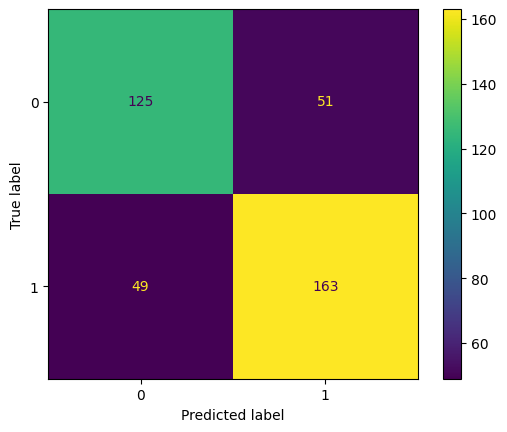

Precision: 0.71, Recall: 0.72, F1-Score: 0.71


(0.5174920352605673, tensor(0.7423, device='cuda:0'))

In [32]:
model_utils.test(test_dataloader, ft_resnet50, loss_fn, device,
                 model_name=model_name, visualize=True)

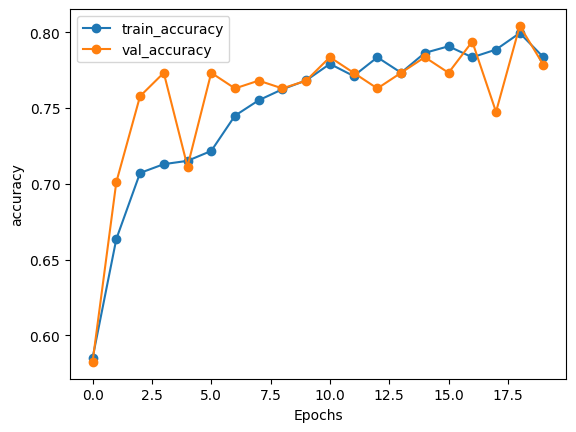

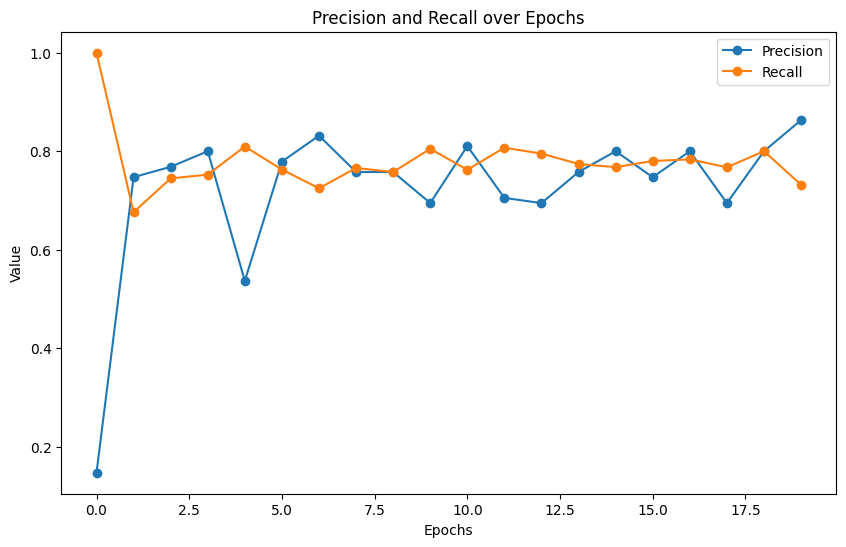

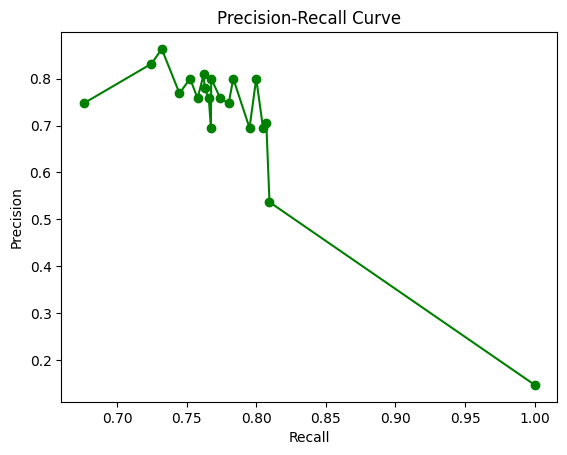

In [33]:
if artifacts != None:
    losses, train_accs, test_accs, precisions, recalls = artifacts
    plotter.plot_generic_metrics((train_accs, test_accs), "accuracy", model_name)
    plotter.plot_precision_recall_curve(precisions, recalls, model_name)

In [34]:
for param in ft_resnet50.parameters():
    param.requires_grad = True


optimizer = torch.optim.AdamW(ft_resnet50.parameters(), lr=LEARNING_RATE)
model_name="FTRes50_expriment_beefy"

In [35]:
artifacts = model_utils.train(dataloaders, loss_fn, optimizer, ft_resnet50, model_name, BATCH_SIZE, EPOCHS, loss_thresh=2.5, force_train=True)

Epoch 1/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training loss: 0.449461, train accuracy: 73.44%  [ 1280/ 1358]
Validation Error:
Accuracy: 72.2%, Avg loss: 0.959682
New best model found! (based on lowest loss)
...and saved.


Epoch 2/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training loss: 0.250610, train accuracy: 84.53%  [ 1280/ 1358]
Validation Error:
Accuracy: 81.4%, Avg loss: 0.538461
New best model found! (based on lowest loss)
...and saved.


Epoch 3/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training loss: 0.292251, train accuracy: 86.64%  [ 1280/ 1358]
Validation Error:
Accuracy: 75.8%, Avg loss: 0.547182


Epoch 4/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training loss: 0.247066, train accuracy: 88.44%  [ 1280/ 1358]
Validation Error:
Accuracy: 75.8%, Avg loss: 0.578915


Epoch 5/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training loss: 0.257222, train accuracy: 90.94%  [ 1280/ 1358]
Validation Error:
Accuracy: 89.2%, Avg loss: 0.287076
New best model found! (based on lowest loss)
...and saved.


Epoch 6/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training loss: 0.154994, train accuracy: 89.30%  [ 1280/ 1358]
Validation Error:
Accuracy: 77.8%, Avg loss: 0.729707


Epoch 7/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training loss: 0.277853, train accuracy: 91.33%  [ 1280/ 1358]
Validation Error:
Accuracy: 76.8%, Avg loss: 0.683883


Epoch 8/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training loss: 0.217751, train accuracy: 90.39%  [ 1280/ 1358]
Validation Error:
Accuracy: 79.9%, Avg loss: 0.350130


Epoch 9/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training loss: 0.152349, train accuracy: 92.81%  [ 1280/ 1358]
Validation Error:
Accuracy: 83.5%, Avg loss: 0.554651


Epoch 10/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training loss: 0.157162, train accuracy: 93.28%  [ 1280/ 1358]
Validation Error:
Accuracy: 79.9%, Avg loss: 0.558110


Epoch 11/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training loss: 0.106848, train accuracy: 92.58%  [ 1280/ 1358]
Validation Error:
Accuracy: 84.0%, Avg loss: 0.402659


Epoch 12/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training loss: 0.124208, train accuracy: 93.05%  [ 1280/ 1358]
Validation Error:
Accuracy: 75.8%, Avg loss: 0.650549


Epoch 13/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training loss: 0.131545, train accuracy: 93.67%  [ 1280/ 1358]
Validation Error:
Accuracy: 84.5%, Avg loss: 0.469447


Epoch 14/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training loss: 0.672772, train accuracy: 93.75%  [ 1280/ 1358]
Validation Error:
Accuracy: 79.9%, Avg loss: 0.467807


Epoch 15/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training loss: 0.155203, train accuracy: 93.98%  [ 1280/ 1358]
Validation Error:
Accuracy: 85.6%, Avg loss: 0.435917


Epoch 16/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training loss: 0.024124, train accuracy: 93.91%  [ 1280/ 1358]
Validation Error:
Accuracy: 87.1%, Avg loss: 0.363271


Epoch 17/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training loss: 0.246570, train accuracy: 93.75%  [ 1280/ 1358]
Validation Error:
Accuracy: 78.9%, Avg loss: 0.673031


Epoch 18/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training loss: 0.075187, train accuracy: 95.62%  [ 1280/ 1358]
Validation Error:
Accuracy: 77.8%, Avg loss: 0.626731


Epoch 19/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training loss: 0.093882, train accuracy: 95.16%  [ 1280/ 1358]
Validation Error:
Accuracy: 84.0%, Avg loss: 0.429208


Epoch 20/20
-------------------------------


c:\Users\tekke\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training loss: 0.154049, train accuracy: 95.16%  [ 1280/ 1358]
Validation Error:
Accuracy: 82.0%, Avg loss: 0.444818




c:\Users\tekke\Desktop\ethics_project2\model_utils.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(weight_path))


Test Error:
Accuracy: 80.9%, Avg loss: 0.570421
Confusion matrix report, tp: 146, fp: 30, fn: 44, tn:168


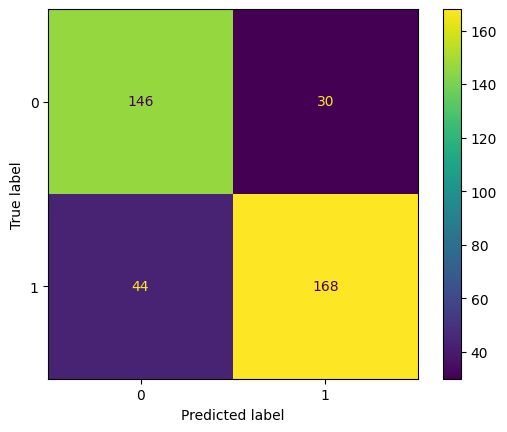

Precision: 0.83, Recall: 0.77, F1-Score: 0.80


(0.5704212051171523, tensor(0.8093, device='cuda:0'))

In [36]:
model_utils.test(test_dataloader, ft_resnet50, loss_fn, device,
                 model_name=model_name, visualize=True)

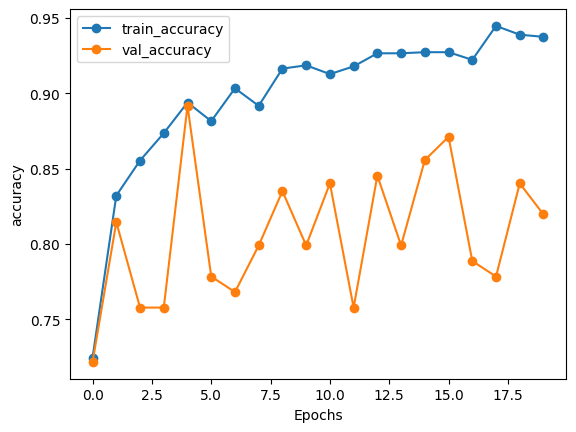

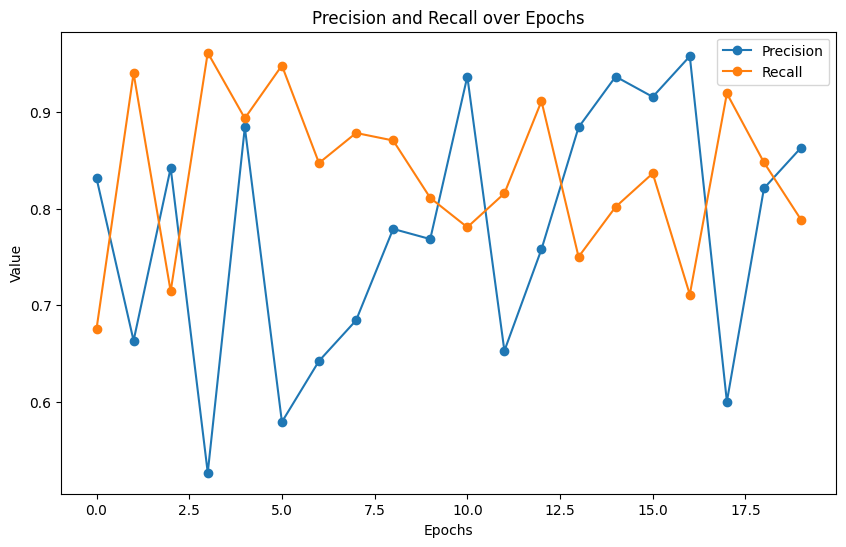

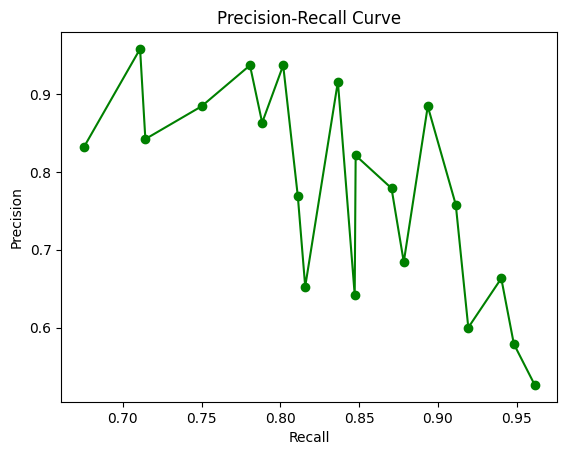

In [37]:
if artifacts != None:
    losses, train_accs, test_accs, precisions, recalls = artifacts
    plotter.plot_generic_metrics((train_accs, test_accs), "accuracy", model_name)
    plotter.plot_precision_recall_curve(precisions, recalls, model_name)